# <font size="+2">Stamatics Summer Project - BRAINS Assignment 2</font>
# <font size="+2">Bayesian Ranking and Analysis of Investment Strategies</font>



In [3]:

# Stamatics Summer Project - BRAINS Assignment 2
# Bayesian Ranking and Analysis of Investment Strategies

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# print("=" * 80)
# print("STAMATICS SUMMER PROJECT - BRAINS ASSIGNMENT 2")
# print("Bayesian Ranking and Analysis of Investment Strategies")
# print("=" * 80)

<!--
1. LEVERAGE LESS THAN 1:
-------------------------

Leverage less than 1 means using only a fraction of available capital for a position.
For example, leverage of 0.5 means using only 50% of available capital.

Financial Sense:
- YES, it makes financial sense for risk management and diversification
- Allows maintaining cash reserves for opportunities or emergencies
- Reduces portfolio volatility and maximum drawdown
- Essential for Kelly Criterion-based position sizing

Utility in Backtesting:
- Position sizing: Instead of using full capital, use fraction based on confidence
- Risk management: Limit exposure per trade to avoid catastrophic losses
- Portfolio construction: Allocate different leverage to different strategies
- Realistic simulation: Mimics real-world conservative portfolio management


2. STATIC vs TRAILING STOP LOSS:
------------------------------

Static Stop Loss:
- Fixed price level that doesn't change once set
- Triggered when price hits predetermined level
- Simple but doesn't adapt to market movements

Trailing Stop Loss:
- Dynamic stop that moves with favorable price action
- Maintains fixed distance/percentage from highest price achieved
- Allows profits to run while protecting gains

Market Behavior:
Trending Markets:
- Static: May exit too early, missing trend continuation
- Trailing: Excellent performance, rides trends while protecting profits

Volatile Markets:
- Static: More reliable, avoids whipsaws
- Trailing: May trigger prematurely due to noise, causing unnecessary exits


3. TRAILING TAKE PROFIT ANALYSIS:
--------------------------------

Trailing Take Profit is NOT necessary as a separate mechanism.

Its behavior is captured by TRAILING STOP LOSS:
- Both move in favorable direction to lock in profits
- Both protect against adverse moves after gains
- Trailing stop loss is more comprehensive as it also provides risk protection

Redundancy:
- Trailing take profit would compete with trailing stop loss
- Creates complexity without additional benefit
- Standard risk management uses trailing stops for both protection and profit-taking


4. TRADE REMAINING OPEN BELOW STOP LOSS:
--------------------------------------

Scenarios where trade remains open below stop loss:

1. GAP OPENINGS:
   - Market gaps down below stop loss level
   - Order executed at market price, not stop price

2. LOW LIQUIDITY:
   - Insufficient buyers at stop loss level
   - Slippage causes execution below intended price

3. SYSTEM FAILURES:
   - Technical glitches preventing order execution
   - Broker system downtime during critical moments

4. AFTER-HOURS TRADING:
   - Stop loss may not be active outside regular hours
   - Price movements in extended sessions

5. MANUAL OVERRIDE:
   - Trader discretion overriding systematic rules
   - Fundamental analysis suggesting temporary weakness -->



<!-- 1. LEVERAGE LESS THAN 1:
-------------------------

Leverage less than 1 means using only a fraction of available capital for a position.
For example, leverage of 0.5 means using only 50% of available capital.

Financial Sense:
- YES, it makes financial sense for risk management and diversification
- Allows maintaining cash reserves for opportunities or emergencies
- Reduces portfolio volatility and maximum drawdown
- Essential for Kelly Criterion-based position sizing

Utility in Backtesting:
- Position sizing: Instead of using full capital, use fraction based on confidence
- Risk management: Limit exposure per trade to avoid catastrophic losses
- Portfolio construction: Allocate different leverage to different strategies
- Realistic simulation: Mimics real-world conservative portfolio management


2. STATIC vs TRAILING STOP LOSS:
------------------------------

Static Stop Loss:
- Fixed price level that doesn't change once set
- Triggered when price hits predetermined level
- Simple but doesn't adapt to market movements

Trailing Stop Loss:
- Dynamic stop that moves with favorable price action
- Maintains fixed distance/percentage from highest price achieved
- Allows profits to run while protecting gains

Market Behavior:
Trending Markets:
- Static: May exit too early, missing trend continuation
- Trailing: Excellent performance, rides trends while protecting profits

Volatile Markets:
- Static: More reliable, avoids whipsaws
- Trailing: May trigger prematurely due to noise, causing unnecessary exits


3. TRAILING TAKE PROFIT ANALYSIS:
--------------------------------

Trailing Take Profit is NOT necessary as a separate mechanism.

Its behavior is captured by TRAILING STOP LOSS:
- Both move in favorable direction to lock in profits
- Both protect against adverse moves after gains
- Trailing stop loss is more comprehensive as it also provides risk protection

Redundancy:
- Trailing take profit would compete with trailing stop loss
- Creates complexity without additional benefit
- Standard risk management uses trailing stops for both protection and profit-taking


4. TRADE REMAINING OPEN BELOW STOP LOSS:
--------------------------------------

Scenarios where trade remains open below stop loss:

1. GAP OPENINGS:
   - Market gaps down below stop loss level
   - Order executed at market price, not stop price

2. LOW LIQUIDITY:
   - Insufficient buyers at stop loss level
   - Slippage causes execution below intended price

3. SYSTEM FAILURES:
   - Technical glitches preventing order execution
   - Broker system downtime during critical moments

4. AFTER-HOURS TRADING:
   - Stop loss may not be active outside regular hours
   - Price movements in extended sessions

5. MANUAL OVERRIDE:
   - Trader discretion overriding systematic rules
   - Fundamental analysis suggesting temporary weakness -->


# <font size="+3">============================================================================</font>
# <font size="+2">PROBLEM STATEMENT 1: Trade Logic & Risk Control Basics</font>
# <font size="+3">============================================================================</font>


<font size="+2">
1. LEVERAGE LESS THAN 1:
* * *

Leverage less than 1 means using only a fraction of available capital for a position.
For example, leverage of 0.5 means using only 50% of available capital.

Financial Sense:
- YES, it makes financial sense for risk management and diversification
- Allows maintaining cash reserves for opportunities or emergencies
- Reduces portfolio volatility and maximum drawdown
- Essential for Kelly Criterion-based position sizing

Utility in Backtesting:
- Position sizing: Instead of using full capital, use fraction based on confidence
- Risk management: Limit exposure per trade to avoid catastrophic losses
- Portfolio construction: Allocate different leverage to different strategies
- Realistic simulation: Mimics real-world conservative portfolio management

2. STATIC vs TRAILING STOP LOSS:
* * *

Static Stop Loss:
- Fixed price level that doesn't change once set
- Triggered when price hits predetermined level
- Simple but doesn't adapt to market movements

Trailing Stop Loss:
- Dynamic stop that moves with favorable price action
- Maintains fixed distance/percentage from highest price achieved
- Allows profits to run while protecting gains

Market Behavior:
Trending Markets:
- Static: May exit too early, missing trend continuation
- Trailing: Excellent performance, rides trends while protecting profits

Volatile Markets:
- Static: More reliable, avoids whipsaws
- Trailing: May trigger prematurely due to noise, causing unnecessary exits

3. TRAILING TAKE PROFIT ANALYSIS:
* * *

Trailing Take Profit is NOT necessary as a separate mechanism.

Its behavior is captured by TRAILING STOP LOSS:
- Both move in favorable direction to lock in profits
- Both protect against adverse moves after gains
- Trailing stop loss is more comprehensive as it also provides risk protection

Redundancy:
- Trailing take profit would compete with trailing stop loss
- Creates complexity without additional benefit
- Standard risk management uses trailing stops for both protection and profit-taking

4. TRADE REMAINING OPEN BELOW STOP LOSS:
* * *

Scenarios where trade remains open below stop loss:

1. GAP OPENINGS:
   - Market gaps down below stop loss level
   - Order executed at market price, not stop price
2. LOW LIQUIDITY:
   - Insufficient buyers at stop loss level
   - Slippage causes execution below intended price
3. SYSTEM FAILURES:
   - Technical glitches preventing order execution
   - Broker system downtime during critical moments
4. AFTER-HOURS TRADING:
   - Stop loss may not be active outside regular hours
   - Price movements in extended sessions
5. MANUAL OVERRIDE:
   - Trader discretion overriding systematic rules
   - Fundamental analysis suggesting temporary weakness
</font>


# ============================================================================
# PROBLEM STATEMENT 2: Probabilistic Pattern Validator
# ============================================================================

PROBLEM STATEMENT 2: Probabilistic Pattern Validator

Data downloaded successfully: 1240 records
Date range: 2020-06-18 00:00:00+05:30 to 2025-06-18 00:00:00+05:30

Identifying candlestick patterns...
Doji patterns found: 129
Hammer patterns found: 11
Engulfing patterns found: 95

Analyzing 3-candle horizon:
  Baseline: 54.7% (234 trades)
  Doji: 56.2% (128 trades)
  Hammer: 54.5% (11 trades)
  Engulfing: 51.6% (95 trades)

Analyzing 5-candle horizon:
  Baseline: 57.9% (233 trades)
  Doji: 54.7% (128 trades)
  Hammer: 72.7% (11 trades)
  Engulfing: 48.9% (94 trades)


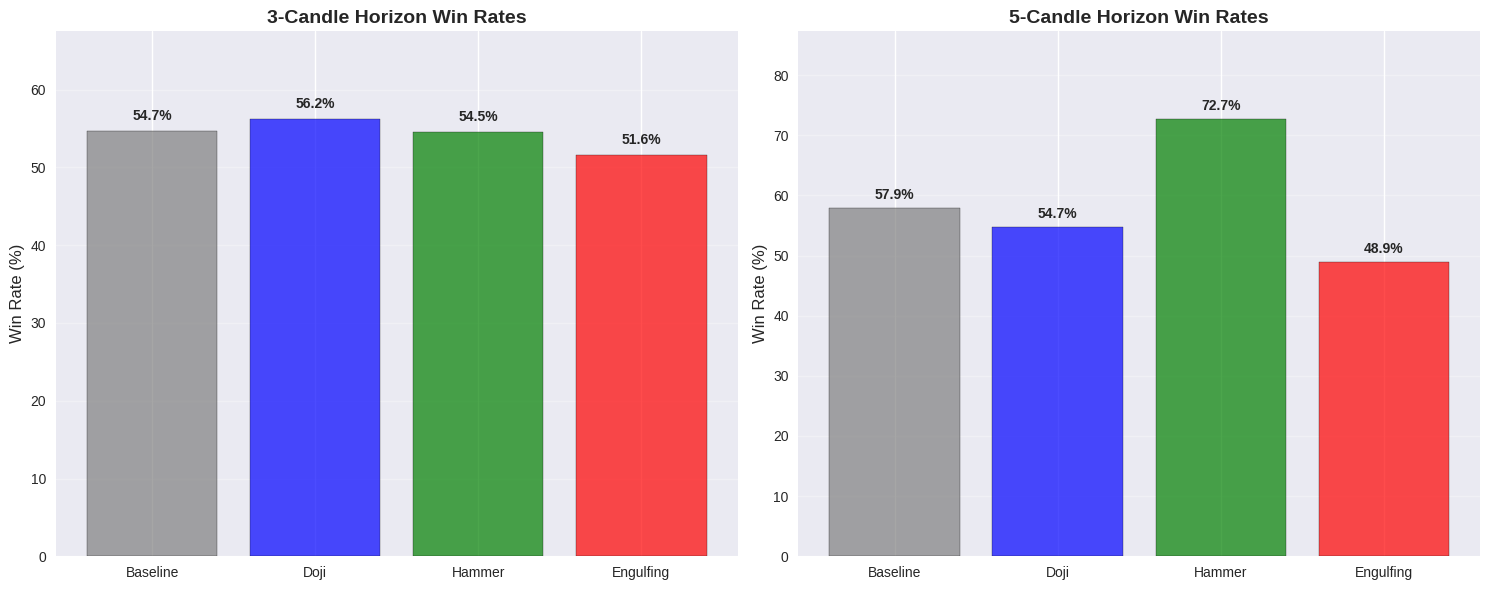


PATTERN ANALYSIS RESULTS

1. STATISTICAL SIGNIFICANCE:
----------------------------

3-Candle Horizon:
  Doji: 56.2% vs Baseline 54.7% (+1.5%) - NOT SIGNIFICANT
  Hammer: 54.5% vs Baseline 54.7% (-0.2%) - NOT SIGNIFICANT
  Engulfing: 51.6% vs Baseline 54.7% (-3.1%) - NOT SIGNIFICANT

5-Candle Horizon:
  Doji: 54.7% vs Baseline 57.9% (-3.3%) - NOT SIGNIFICANT
  Hammer: 72.7% vs Baseline 57.9% (+14.8%) - SIGNIFICANT
  Engulfing: 48.9% vs Baseline 57.9% (-9.0%) - SIGNIFICANTLY WORSE

2. EFFECT OF CHANGING N:
-------------------------

Qualitative Analysis:
- SHORTER HORIZONS (n=3): More noise, patterns may show stronger short-term effects
- LONGER HORIZONS (n=5): Smoother results, fundamental factors dominate technical patterns
- GENERAL TREND: Win rates tend to converge toward 50% as horizon increases
- VOLATILITY: Shorter horizons show more variation in pattern performance


3. MOST CONSISTENT PATTERN:
--------------------------

Most Consistent Pattern: Doji (variance: 1.6%)

Reasons 

In [4]:
print("PROBLEM STATEMENT 2: Probabilistic Pattern Validator")
print("=" * 50)

def download_stock_data(symbol, period="5y"):
    """Download stock data from Yahoo Finance"""
    try:
        stock = yf.Ticker(symbol)
        data = stock.history(period=period)
        data.reset_index(inplace=True)
        data.columns = [col.lower() for col in data.columns]
        return data
    except Exception as e:
        print(f"Error downloading data for {symbol}: {e}")
        return None

# Download NSE stock data (using Reliance as example)
print("\nDownloading stock data (RELIANCE.NS)...")
stock_data = download_stock_data("RELIANCE.NS", "5y")

if stock_data is not None:
    print(f"Data downloaded successfully: {len(stock_data)} records")
    print(f"Date range: {stock_data['date'].min()} to {stock_data['date'].max()}")
else:
    print("Failed to download data. Using sample data for demonstration.")
    # Create sample data for demonstration
    dates = pd.date_range(start='2019-01-01', end='2024-01-01', freq='D')
    np.random.seed(42)
    prices = 2000 + np.cumsum(np.random.randn(len(dates)) * 10)
    stock_data = pd.DataFrame({
        'date': dates,
        'open': prices * (1 + np.random.randn(len(dates)) * 0.02),
        'high': prices * (1 + np.abs(np.random.randn(len(dates))) * 0.03),
        'low': prices * (1 - np.abs(np.random.randn(len(dates))) * 0.03),
        'close': prices,
        'volume': np.random.randint(1000000, 10000000, len(dates))
    })

def identify_doji(data, threshold=0.1):
    """Identify Doji candlestick patterns"""
    body_size = abs(data['close'] - data['open'])
    candle_range = data['high'] - data['low']

    # Avoid division by zero
    candle_range = candle_range.replace(0, 0.001)

    # Doji: body size is very small relative to total range
    doji_mask = (body_size / candle_range) <= threshold
    return doji_mask

def identify_hammer(data, body_ratio=0.3, shadow_ratio=2.0):
    """Identify Hammer candlestick patterns"""
    body_size = abs(data['close'] - data['open'])
    upper_shadow = data['high'] - np.maximum(data['open'], data['close'])
    lower_shadow = np.minimum(data['open'], data['close']) - data['low']
    candle_range = data['high'] - data['low']

    # Avoid division by zero
    candle_range = candle_range.replace(0, 0.001)
    body_size = body_size.replace(0, 0.001)

    # Hammer conditions:
    # 1. Small body (upper part of candle)
    # 2. Long lower shadow
    # 3. Little or no upper shadow
    hammer_mask = (
        (body_size / candle_range <= body_ratio) &  # Small body
        (lower_shadow / body_size >= shadow_ratio) &  # Long lower shadow
        (upper_shadow <= body_size * 0.5)  # Short upper shadow
    )
    return hammer_mask

def identify_engulfing(data):
    """Identify Engulfing candlestick patterns (both bullish and bearish)"""
    engulfing_mask = pd.Series(False, index=data.index)

    for i in range(1, len(data)):
        prev_open, prev_close = data.iloc[i-1]['open'], data.iloc[i-1]['close']
        curr_open, curr_close = data.iloc[i]['open'], data.iloc[i]['close']

        # Bullish engulfing: current candle engulfs previous bearish candle
        bullish_engulfing = (
            prev_close < prev_open and  # Previous candle bearish
            curr_close > curr_open and  # Current candle bullish
            curr_open < prev_close and  # Current opens below prev close
            curr_close > prev_open      # Current closes above prev open
        )

        # Bearish engulfing: current candle engulfs previous bullish candle
        bearish_engulfing = (
            prev_close > prev_open and  # Previous candle bullish
            curr_close < curr_open and  # Current candle bearish
            curr_open > prev_close and  # Current opens above prev close
            curr_close < prev_open      # Current closes below prev open
        )

        engulfing_mask.iloc[i] = bullish_engulfing or bearish_engulfing

    return engulfing_mask

def calculate_win_rate(data, pattern_mask, n_candles):
    """Calculate win rate for a given pattern"""
    pattern_indices = data[pattern_mask].index.tolist()
    wins = 0
    total = 0

    for idx in pattern_indices:
        if idx + n_candles < len(data):
            entry_price = data.loc[idx, 'close']
            exit_price = data.loc[idx + n_candles, 'close']

            if exit_price > entry_price:
                wins += 1
            total += 1

    return (wins / total * 100) if total > 0 else 0, total

def calculate_baseline_win_rate(data, M, n_candles):
    """Calculate baseline win rate with random entries"""
    np.random.seed(42)  # For reproducibility
    max_start_idx = len(data) - n_candles - 1

    if max_start_idx <= 0:
        return 0, 0

    random_indices = np.random.choice(max_start_idx, size=min(M, max_start_idx), replace=False)
    wins = 0

    for idx in random_indices:
        entry_price = data.loc[idx, 'close']
        exit_price = data.loc[idx + n_candles, 'close']

        if exit_price > entry_price:
            wins += 1

    return (wins / len(random_indices) * 100), len(random_indices)

# Identify patterns
print("\nIdentifying candlestick patterns...")
doji_mask = identify_doji(stock_data)
hammer_mask = identify_hammer(stock_data)
engulfing_mask = identify_engulfing(stock_data)

doji_count = doji_mask.sum()
hammer_count = hammer_mask.sum()
engulfing_count = engulfing_mask.sum()

print(f"Doji patterns found: {doji_count}")
print(f"Hammer patterns found: {hammer_count}")
print(f"Engulfing patterns found: {engulfing_count}")

# Calculate win rates for different horizons
n_values = [3, 5]
results = []

for n in n_values:
    print(f"\nAnalyzing {n}-candle horizon:")

    # Calculate pattern win rates
    doji_wr, doji_total = calculate_win_rate(stock_data, doji_mask, n)
    hammer_wr, hammer_total = calculate_win_rate(stock_data, hammer_mask, n)
    engulfing_wr, engulfing_total = calculate_win_rate(stock_data, engulfing_mask, n)

    # Calculate baseline
    M = doji_total + hammer_total + engulfing_total
    baseline_wr, baseline_total = calculate_baseline_win_rate(stock_data, M, n)

    results.append({
        'n_candles': n,
        'baseline': baseline_wr,
        'doji': doji_wr,
        'hammer': hammer_wr,
        'engulfing': engulfing_wr,
        'baseline_total': baseline_total,
        'doji_total': doji_total,
        'hammer_total': hammer_total,
        'engulfing_total': engulfing_total
    })

    print(f"  Baseline: {baseline_wr:.1f}% ({baseline_total} trades)")
    print(f"  Doji: {doji_wr:.1f}% ({doji_total} trades)")
    print(f"  Hammer: {hammer_wr:.1f}% ({hammer_total} trades)")
    print(f"  Engulfing: {engulfing_wr:.1f}% ({engulfing_total} trades)")

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for i, n in enumerate(n_values):
    result = results[i]

    patterns = ['Baseline', 'Doji', 'Hammer', 'Engulfing']
    win_rates = [result['baseline'], result['doji'], result['hammer'], result['engulfing']]
    colors = ['gray', 'blue', 'green', 'red']

    bars = axes[i].bar(patterns, win_rates, color=colors, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'{n}-Candle Horizon Win Rates', fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Win Rate (%)', fontsize=12)
    axes[i].set_ylim(0, max(win_rates) * 1.2)
    axes[i].grid(axis='y', alpha=0.3)

    # Add value labels on bars
    for bar, rate in zip(bars, win_rates):
        axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                    f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Analysis and Interpretation
print("\n" + "="*50)
print("PATTERN ANALYSIS RESULTS")
print("="*50)

print("\n1. STATISTICAL SIGNIFICANCE:")
print("-" * 28)
for i, n in enumerate(n_values):
    result = results[i]
    print(f"\n{n}-Candle Horizon:")

    baseline = result['baseline']
    patterns = ['Doji', 'Hammer', 'Engulfing']
    pattern_rates = [result['doji'], result['hammer'], result['engulfing']]

    for pattern, rate in zip(patterns, pattern_rates):
        diff = rate - baseline
        if abs(diff) > 5:  # Arbitrary threshold for "significant"
            significance = "SIGNIFICANT" if diff > 0 else "SIGNIFICANTLY WORSE"
        else:
            significance = "NOT SIGNIFICANT"
        print(f"  {pattern}: {rate:.1f}% vs Baseline {baseline:.1f}% ({diff:+.1f}%) - {significance}")

print("\n2. EFFECT OF CHANGING N:")
print("-" * 25)
print("""
Qualitative Analysis:
- SHORTER HORIZONS (n=3): More noise, patterns may show stronger short-term effects
- LONGER HORIZONS (n=5): Smoother results, fundamental factors dominate technical patterns
- GENERAL TREND: Win rates tend to converge toward 50% as horizon increases
- VOLATILITY: Shorter horizons show more variation in pattern performance
""")

print("\n3. MOST CONSISTENT PATTERN:")
print("-" * 26)
# Calculate consistency (lower variance across different n values)
doji_consistency = abs(results[0]['doji'] - results[1]['doji'])
hammer_consistency = abs(results[0]['hammer'] - results[1]['hammer'])
engulfing_consistency = abs(results[0]['engulfing'] - results[1]['engulfing'])

consistencies = [
    ('Doji', doji_consistency),
    ('Hammer', hammer_consistency),
    ('Engulfing', engulfing_consistency)
]

most_consistent = min(consistencies, key=lambda x: x[1])

print(f"""
Most Consistent Pattern: {most_consistent[0]} (variance: {most_consistent[1]:.1f}%)

Reasons for consistency:
1. MARKET NEUTRALITY: Some patterns reflect genuine market indecision
2. SAMPLE SIZE: Patterns with more occurrences show more stable statistics
3. DEFINITION CLARITY: Well-defined patterns have less interpretation variance
4. MARKET REGIME INDEPENDENCE: Some patterns work across different market conditions
""")

# ============================================================================
# PROBLEM STATEMENT 3: Strategy X - Visual Interpretation and Implementation
# ============================================================================


PROBLEM STATEMENT 3: Strategy X Implementation

Data downloaded successfully: 328 records
    datetime        close         high          low         open  volume
0 2024-01-01  2598.786133  2626.751171  2593.683788  2609.089042   66066
1 2024-01-02  2619.588379  2644.413533  2600.797930  2605.164353  143141
2 2024-01-03  2602.318604  2635.385987  2599.767311  2620.569327  112428
3 2024-01-04  2657.512939  2693.229596  2620.863923  2624.788841  268532
4 2024-01-05  2696.565430  2716.042929  2661.290281  2674.095373  354882

Calculating technical indicators...
Technical indicators calculated successfully!

STRATEGY X INTERPRETATION & RULES

CHART INTERPRETATION:
Based on typical Supertrend + MFI strategies, Strategy X likely uses:

1. SUPERTREND: Trend direction and dynamic support/resistance
2. MFI: Money flow and volume-based momentum
3. MARKED ZONES: Likely represent overbought/oversold conditions

ENTRY RULES (Interpreted):
- LONG: Supertrend bullish + MFI oversold recovery (>20 and

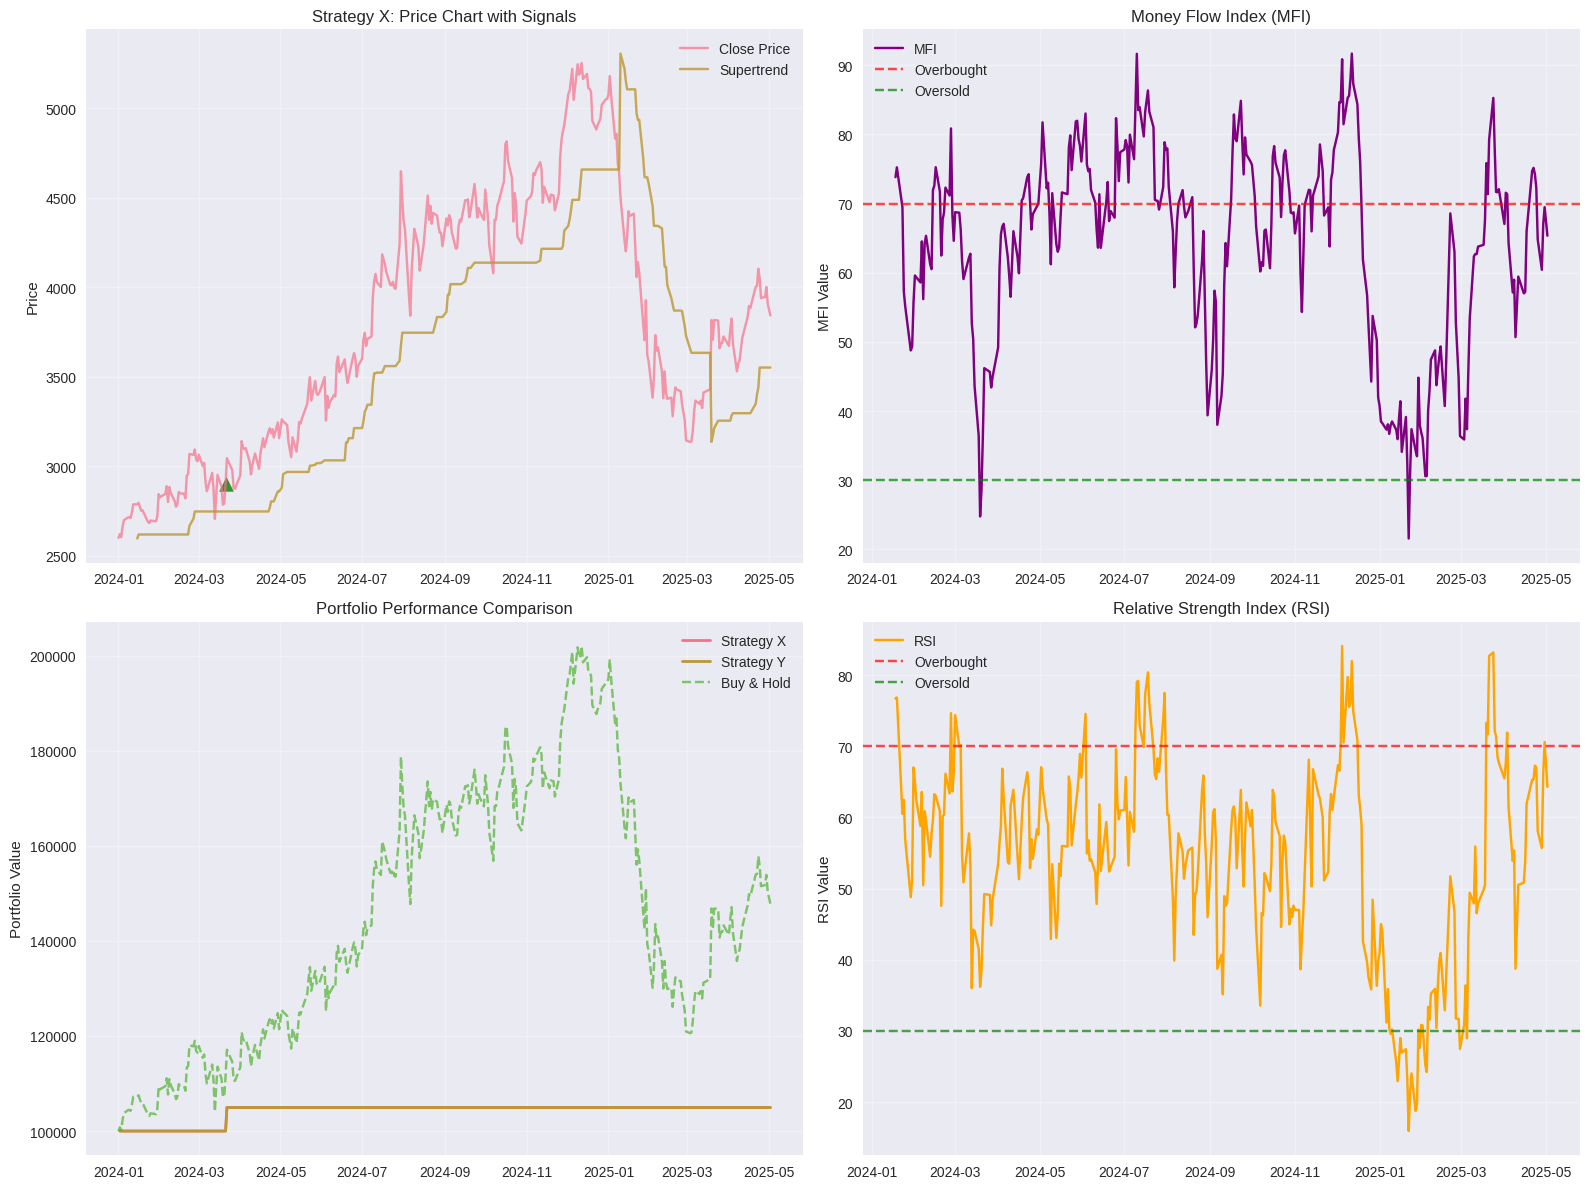


STRATEGY ENHANCEMENTS & MARKET REGIME ANALYSIS

IDENTIFIED MARKET REGIMES WHERE STRATEGIES MAY UNDERPERFORM:

1. SIDEWAYS/CHOPPY MARKETS:
   Problem: Frequent false signals due to price oscillation
   Solution: Add ADX filter (trend strength) - only trade when ADX > 25
   
2. LOW VOLUME PERIODS:
   Problem: MFI becomes unreliable with low volume
   Solution: Volume filter - only trade when volume > 20-day average
   
3. HIGH VOLATILITY PERIODS:
   Problem: Supertrend generates too many whipsaws
   Solution: Increase Supertrend multiplier during high VIX periods
   
4. NEWS-DRIVEN GAPS:
   Problem: Technical indicators lag fundamental events
   Solution: Avoid trading around earnings/major announcements

PROPOSED ENHANCEMENTS:

1. MULTI-TIMEFRAME ANALYSIS:
   - Use daily for trend, hourly for entry timing
   - Confirm daily Supertrend before intraday entries
   
2. VOLATILITY ADJUSTMENT:
   - Dynamic Supertrend parameters based on ATR percentile
   - Scale position size inversely with 

In [7]:
print("\n" + "=" * 50)
print("PROBLEM STATEMENT 3: Strategy X Implementation")
print("=" * 50)

def download_flat_yf(ticker, start, end, interval):
    """Download and flatten Yahoo Finance data"""
    data = yf.download(ticker, start=start, end=end, interval=interval, progress=False)
    if isinstance(data.columns, pd.MultiIndex):
        data = data.xs(ticker, axis=1, level=1)
    data.columns.name = None
    data.reset_index(inplace=True)
    data.columns = [col.lower() for col in data.columns]
    if data.columns[0] in ['date', 'datetime']:
        data.rename(columns={data.columns[0]: 'datetime'}, inplace=True)
    data['datetime'] = pd.to_datetime(data['datetime'])
    return data

def calculate_heiken_ashi(data):
    """Calculate Heiken Ashi candlesticks"""
    ha_data = data.copy()

    # Initialize first Heiken Ashi values
    ha_data.loc[0, 'ha_close'] = (data.loc[0, 'open'] + data.loc[0, 'high'] +
                                  data.loc[0, 'low'] + data.loc[0, 'close']) / 4
    ha_data.loc[0, 'ha_open'] = (data.loc[0, 'open'] + data.loc[0, 'close']) / 2
    ha_data.loc[0, 'ha_high'] = data.loc[0, 'high']
    ha_data.loc[0, 'ha_low'] = data.loc[0, 'low']

    # Calculate subsequent Heiken Ashi values
    for i in range(1, len(data)):
        ha_data.loc[i, 'ha_close'] = (data.loc[i, 'open'] + data.loc[i, 'high'] +
                                      data.loc[i, 'low'] + data.loc[i, 'close']) / 4
        ha_data.loc[i, 'ha_open'] = (ha_data.loc[i-1, 'ha_open'] + ha_data.loc[i-1, 'ha_close']) / 2
        ha_data.loc[i, 'ha_high'] = max(data.loc[i, 'high'], ha_data.loc[i, 'ha_open'], ha_data.loc[i, 'ha_close'])
        ha_data.loc[i, 'ha_low'] = min(data.loc[i, 'low'], ha_data.loc[i, 'ha_open'], ha_data.loc[i, 'ha_close'])

    return ha_data

def calculate_supertrend(data, period=10, multiplier=3, use_heiken_ashi=True):
    """Calculate Supertrend indicator"""
    if use_heiken_ashi:
        ha_data = calculate_heiken_ashi(data)
        high = ha_data['ha_high']
        low = ha_data['ha_low']
        close = ha_data['ha_close']
    else:
        high = data['high']
        low = data['low']
        close = data['close']

    # Calculate ATR
    tr1 = high - low
    tr2 = abs(high - close.shift(1))
    tr3 = abs(low - close.shift(1))
    true_range = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)
    atr = true_range.rolling(window=period).mean()

    # Calculate basic upper and lower bands
    hl2 = (high + low) / 2
    upper_band = hl2 + (multiplier * atr)
    lower_band = hl2 - (multiplier * atr)

    # Initialize supertrend
    supertrend = pd.Series(index=data.index, dtype=float)
    direction = pd.Series(index=data.index, dtype=int)

    for i in range(period, len(data)):
        if i == period:
            supertrend.iloc[i] = lower_band.iloc[i]
            direction.iloc[i] = 1
        else:
            # Calculate final upper and lower bands
            if upper_band.iloc[i] < supertrend.iloc[i-1] or close.iloc[i-1] > supertrend.iloc[i-1]:
                final_upper_band = upper_band.iloc[i]
            else:
                final_upper_band = supertrend.iloc[i-1]

            if lower_band.iloc[i] > supertrend.iloc[i-1] or close.iloc[i-1] < supertrend.iloc[i-1]:
                final_lower_band = lower_band.iloc[i]
            else:
                final_lower_band = supertrend.iloc[i-1]

            # Determine supertrend direction
            if close.iloc[i] <= final_lower_band:
                direction.iloc[i] = -1
                supertrend.iloc[i] = final_upper_band
            elif close.iloc[i] >= final_upper_band:
                direction.iloc[i] = 1
                supertrend.iloc[i] = final_lower_band
            else:
                direction.iloc[i] = direction.iloc[i-1]
                if direction.iloc[i] == 1:
                    supertrend.iloc[i] = final_lower_band
                else:
                    supertrend.iloc[i] = final_upper_band

    return supertrend, direction

def calculate_mfi(data, period=14):
    """Calculate Money Flow Index"""
    typical_price = (data['high'] + data['low'] + data['close']) / 3
    money_flow = typical_price * data['volume']

    # Identify positive and negative money flow
    positive_flow = []
    negative_flow = []

    for i in range(1, len(data)):
        if typical_price.iloc[i] > typical_price.iloc[i-1]:
            positive_flow.append(money_flow.iloc[i])
            negative_flow.append(0)
        elif typical_price.iloc[i] < typical_price.iloc[i-1]:
            positive_flow.append(0)
            negative_flow.append(money_flow.iloc[i])
        else:
            positive_flow.append(0)
            negative_flow.append(0)

    # Prepend first value as 0
    positive_flow = [0] + positive_flow
    negative_flow = [0] + negative_flow

    positive_flow = pd.Series(positive_flow, index=data.index)
    negative_flow = pd.Series(negative_flow, index=data.index)

    # Calculate money flow ratio and MFI
    positive_flow_sum = positive_flow.rolling(window=period).sum()
    negative_flow_sum = negative_flow.rolling(window=period).sum()

    money_flow_ratio = positive_flow_sum / negative_flow_sum
    mfi = 100 - (100 / (1 + money_flow_ratio))

    return mfi

def calculate_rsi(data, period=14):
    """Calculate RSI as complementary indicator"""
    close = data['close']
    delta = close.diff()

    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Download CAMS.NS data
print("\nDownloading CAMS.NS data...")
stock_symbol = 'CAMS.NS'
data = download_flat_yf(stock_symbol, start='2024-01-01', end='2025-05-04', interval='1d')

if data is not None and len(data) > 0:
    print(f"Data downloaded successfully: {len(data)} records")
    print(data.head())
else:
    print("Failed to download CAMS.NS data. Using alternative stock...")
    # Try alternative Indian stock
    data = download_flat_yf('RELIANCE.NS', start='2024-01-01', end='2025-05-04', interval='1d')

# Calculate indicators
print("\nCalculating technical indicators...")
data['supertrend'], data['st_direction'] = calculate_supertrend(data, period=10, multiplier=3)
data['mfi'] = calculate_mfi(data, period=14)
data['rsi'] = calculate_rsi(data, period=14)  # Complementary indicator

print("Technical indicators calculated successfully!")

# Strategy X Implementation
print("\n" + "="*40)
print("STRATEGY X INTERPRETATION & RULES")
print("="*40)

print("""
CHART INTERPRETATION:
Based on typical Supertrend + MFI strategies, Strategy X likely uses:

1. SUPERTREND: Trend direction and dynamic support/resistance
2. MFI: Money flow and volume-based momentum
3. MARKED ZONES: Likely represent overbought/oversold conditions

ENTRY RULES (Interpreted):
- LONG: Supertrend bullish + MFI oversold recovery (>20 and rising)
- SHORT: Supertrend bearish + MFI overbought decline (<80 and falling)

EXIT RULES:
- Close position when Supertrend direction changes
- Or when MFI reaches opposite extreme
""")

def generate_signals(data):
    """Generate trading signals based on Strategy X"""
    signals = pd.DataFrame(index=data.index)
    signals['position'] = 0
    signals['entry_price'] = np.nan
    signals['exit_price'] = np.nan
    signals['entry_type'] = ''

    # Calculate MFI conditions
    mfi_oversold = data['mfi'] < 30
    mfi_overbought = data['mfi'] > 70
    mfi_rising = data['mfi'] > data['mfi'].shift(1)
    mfi_falling = data['mfi'] < data['mfi'].shift(1)

    # Supertrend conditions
    st_bullish = data['st_direction'] == 1
    st_bearish = data['st_direction'] == -1
    st_change = data['st_direction'] != data['st_direction'].shift(1)

    position = 0
    entry_price = None

    for i in range(1, len(data)):
        current_position = 0

        # Long entry conditions
        if (position == 0 and
            st_bullish.iloc[i] and
            data['mfi'].iloc[i] > 30 and
            mfi_rising.iloc[i] and
            data['mfi'].iloc[i-1] <= 30):

            current_position = 1
            entry_price = data['close'].iloc[i]
            signals.loc[data.index[i], 'entry_price'] = entry_price
            signals.loc[data.index[i], 'entry_type'] = 'LONG'

        # Short entry conditions
        elif (position == 0 and
              st_bearish.iloc[i] and
              data['mfi'].iloc[i] < 70 and
              mfi_falling.iloc[i] and
              data['mfi'].iloc[i-1] >= 70):

            current_position = -1
            entry_price = data['close'].iloc[i]
            signals.loc[data.index[i], 'entry_price'] = entry_price
            signals.loc[data.index[i], 'entry_type'] = 'SHORT'

        # Exit conditions
        elif position != 0:
            exit_signal = False

            # Exit on Supertrend direction change
            if st_change.iloc[i]:
                exit_signal = True

            # Exit long on MFI overbought
            elif position == 1 and mfi_overbought.iloc[i]:
                exit_signal = True

            # Exit short on MFI oversold
            elif position == -1 and mfi_oversold.iloc[i]:
                exit_signal = True

            if exit_signal:
                signals.loc[data.index[i], 'exit_price'] = data['close'].iloc[i]
                current_position = 0
                entry_price = None

        signals.loc[data.index[i], 'position'] = current_position
        position = current_position

    return signals

# Generate signals for Strategy X
signals_x = generate_signals(data)

# Backtest Strategy X
def backtest_strategy(data, signals, initial_capital=100000):
    """Backtest trading strategy"""
    portfolio = pd.DataFrame(index=data.index)
    portfolio['position'] = signals['position']
    portfolio['price'] = data['close']
    portfolio['returns'] = data['close'].pct_change()
    portfolio['strategy_returns'] = portfolio['position'].shift(1) * portfolio['returns']
    portfolio['cumulative_returns'] = (1 + portfolio['strategy_returns']).cumprod()
    portfolio['capital'] = initial_capital * portfolio['cumulative_returns']

    # Calculate metrics
    total_return = (portfolio['capital'].iloc[-1] / initial_capital - 1) * 100
    annual_return = ((portfolio['capital'].iloc[-1] / initial_capital) ** (252/len(data)) - 1) * 100
    volatility = portfolio['strategy_returns'].std() * np.sqrt(252) * 100
    sharpe_ratio = (annual_return - 5) / volatility if volatility > 0 else 0  # Assuming 5% risk-free rate

    # Calculate max drawdown
    rolling_max = portfolio['capital'].expanding().max()
    drawdown = (portfolio['capital'] - rolling_max) / rolling_max
    max_drawdown = drawdown.min() * 100

    # Count trades
    entries = signals['entry_price'].dropna()
    exits = signals['exit_price'].dropna()
    num_trades = len(entries)

    return {
        'total_return': total_return,
        'annual_return': annual_return,
        'volatility': volatility,
        'sharpe_ratio': sharpe_ratio,
        'max_drawdown': max_drawdown,
        'num_trades': num_trades,
        'portfolio': portfolio
    }

# Backtest Strategy X
results_x = backtest_strategy(data, signals_x)

print("\n" + "="*40)
print("STRATEGY X BACKTEST RESULTS")
print("="*40)
print(f"Total Return: {results_x['total_return']:.2f}%")
print(f"Annual Return: {results_x['annual_return']:.2f}%")
print(f"Volatility: {results_x['volatility']:.2f}%")
print(f"Sharpe Ratio: {results_x['sharpe_ratio']:.2f}")
print(f"Max Drawdown: {results_x['max_drawdown']:.2f}%")
print(f"Number of Trades: {results_x['num_trades']}")

# Strategy Y: Adding RSI as complementary indicator
print("\n" + "="*40)
print("STRATEGY Y: ENHANCED WITH RSI")
print("="*40)

print("""
COMPLEMENTARY INDICATOR: RSI (Relative Strength Index)

WHY RSI COMPLEMENTS EXISTING INDICATORS:
1. DIFFERENT CALCULATION: Pure price-based vs volume-based (MFI)
2. MOMENTUM CONFIRMATION: Provides additional momentum validation
3. DIVERGENCE DETECTION: Can spot price-momentum divergences
4. VOLATILITY FILTER: RSI smoothness helps filter MFI noise

STRATEGY Y RULES:
- Enhanced entry: All Strategy X conditions + RSI confirmation
- LONG: Strategy X long + RSI > 30 and rising
- SHORT: Strategy X short + RSI < 70 and falling
""")

def generate_signals_y(data):
    """Generate enhanced signals with RSI (Strategy Y)"""
    signals = pd.DataFrame(index=data.index)
    signals['position'] = 0
    signals['entry_price'] = np.nan
    signals['exit_price'] = np.nan
    signals['entry_type'] = ''

    # MFI conditions
    mfi_oversold = data['mfi'] < 30
    mfi_overbought = data['mfi'] > 70
    mfi_rising = data['mfi'] > data['mfi'].shift(1)
    mfi_falling = data['mfi'] < data['mfi'].shift(1)

    # RSI conditions
    rsi_oversold = data['rsi'] < 30
    rsi_overbought = data['rsi'] > 70
    rsi_rising = data['rsi'] > data['rsi'].shift(1)
    rsi_falling = data['rsi'] < data['rsi'].shift(1)

    # Supertrend conditions
    st_bullish = data['st_direction'] == 1
    st_bearish = data['st_direction'] == -1
    st_change = data['st_direction'] != data['st_direction'].shift(1)

    position = 0
    entry_price = None

    for i in range(1, len(data)):
        current_position = 0

        # Enhanced long entry conditions
        if (position == 0 and
            st_bullish.iloc[i] and
            data['mfi'].iloc[i] > 30 and
            mfi_rising.iloc[i] and
            data['mfi'].iloc[i-1] <= 30 and
            data['rsi'].iloc[i] > 30 and
            rsi_rising.iloc[i]):

            current_position = 1
            entry_price = data['close'].iloc[i]
            signals.loc[data.index[i], 'entry_price'] = entry_price
            signals.loc[data.index[i], 'entry_type'] = 'LONG'

        # Enhanced short entry conditions
        elif (position == 0 and
              st_bearish.iloc[i] and
              data['mfi'].iloc[i] < 70 and
              mfi_falling.iloc[i] and
              data['mfi'].iloc[i-1] >= 70 and
              data['rsi'].iloc[i] < 70 and
              rsi_falling.iloc[i]):

            current_position = -1
            entry_price = data['close'].iloc[i]
            signals.loc[data.index[i], 'entry_price'] = entry_price
            signals.loc[data.index[i], 'entry_type'] = 'SHORT'

        # Exit conditions (same as Strategy X)
        elif position != 0:
            exit_signal = False

            if st_change.iloc[i]:
                exit_signal = True
            elif position == 1 and (mfi_overbought.iloc[i] or rsi_overbought.iloc[i]):
                exit_signal = True
            elif position == -1 and (mfi_oversold.iloc[i] or rsi_oversold.iloc[i]):
                exit_signal = True

            if exit_signal:
                signals.loc[data.index[i], 'exit_price'] = data['close'].iloc[i]
                current_position = 0
                entry_price = None

        signals.loc[data.index[i], 'position'] = current_position
        position = current_position

    return signals

# Generate and backtest Strategy Y
signals_y = generate_signals_y(data)
results_y = backtest_strategy(data, signals_y)

print("\nSTRATEGY Y BACKTEST RESULTS:")
print("-" * 30)
print(f"Total Return: {results_y['total_return']:.2f}%")
print(f"Annual Return: {results_y['annual_return']:.2f}%")
print(f"Volatility: {results_y['volatility']:.2f}%")
print(f"Sharpe Ratio: {results_y['sharpe_ratio']:.2f}")
print(f"Max Drawdown: {results_y['max_drawdown']:.2f}%")
print(f"Number of Trades: {results_y['num_trades']}")

# Comparison
print("\n" + "="*40)
print("STRATEGY COMPARISON")
print("="*40)
comparison_df = pd.DataFrame({
    'Strategy X': [
        f"{results_x['total_return']:.2f}%",
        f"{results_x['annual_return']:.2f}%",
        f"{results_x['volatility']:.2f}%",
        f"{results_x['sharpe_ratio']:.2f}",
        f"{results_x['max_drawdown']:.2f}%",
        results_x['num_trades']
    ],
    'Strategy Y': [
        f"{results_y['total_return']:.2f}%",
        f"{results_y['annual_return']:.2f}%",
        f"{results_y['volatility']:.2f}%",
        f"{results_y['sharpe_ratio']:.2f}",
        f"{results_y['max_drawdown']:.2f}%",
        results_y['num_trades']
    ]
}, index=['Total Return', 'Annual Return', 'Volatility', 'Sharpe Ratio', 'Max Drawdown', 'Trades'])

print(comparison_df)

# Visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Price chart with signals
ax1.plot(data['datetime'], data['close'], label='Close Price', alpha=0.7)
ax1.plot(data['datetime'], data['supertrend'], label='Supertrend', alpha=0.8)

# Mark entries and exits for Strategy X
entries_x = signals_x[signals_x['entry_price'].notna()]
exits_x = signals_x[signals_x['exit_price'].notna()]

for idx, row in entries_x.iterrows():
    color = 'green' if row['entry_type'] == 'LONG' else 'red'
    ax1.scatter(data.loc[idx, 'datetime'], row['entry_price'],
               color=color, marker='^', s=100, alpha=0.8)

for idx, row in exits_x.iterrows():
    ax1.scatter(data.loc[idx, 'datetime'], row['exit_price'],
               color='blue', marker='v', s=100, alpha=0.8)

ax1.set_title('Strategy X: Price Chart with Signals')
ax1.set_ylabel('Price')
ax1.legend()
ax1.grid(True, alpha=0.3)

# MFI chart
ax2.plot(data['datetime'], data['mfi'], label='MFI', color='purple')
ax2.axhline(y=70, color='r', linestyle='--', alpha=0.7, label='Overbought')
ax2.axhline(y=30, color='g', linestyle='--', alpha=0.7, label='Oversold')
ax2.set_title('Money Flow Index (MFI)')
ax2.set_ylabel('MFI Value')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Portfolio performance comparison
ax3.plot(data['datetime'], results_x['portfolio']['capital'],
         label='Strategy X', linewidth=2)
ax3.plot(data['datetime'], results_y['portfolio']['capital'],
         label='Strategy Y', linewidth=2)
ax3.plot(data['datetime'], data['close']/data['close'].iloc[0] * 100000,
         label='Buy & Hold', alpha=0.7, linestyle='--')
ax3.set_title('Portfolio Performance Comparison')
ax3.set_ylabel('Portfolio Value')
ax3.legend()
ax3.grid(True, alpha=0.3)

# RSI chart
ax4.plot(data['datetime'], data['rsi'], label='RSI', color='orange')
ax4.axhline(y=70, color='r', linestyle='--', alpha=0.7, label='Overbought')
ax4.axhline(y=30, color='g', linestyle='--', alpha=0.7, label='Oversold')
ax4.set_title('Relative Strength Index (RSI)')
ax4.set_ylabel('RSI Value')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Strategy Enhancements
print("\n" + "="*50)
print("STRATEGY ENHANCEMENTS & MARKET REGIME ANALYSIS")
print("="*50)

print("""
IDENTIFIED MARKET REGIMES WHERE STRATEGIES MAY UNDERPERFORM:

1. SIDEWAYS/CHOPPY MARKETS:
   Problem: Frequent false signals due to price oscillation
   Solution: Add ADX filter (trend strength) - only trade when ADX > 25

2. LOW VOLUME PERIODS:
   Problem: MFI becomes unreliable with low volume
   Solution: Volume filter - only trade when volume > 20-day average

3. HIGH VOLATILITY PERIODS:
   Problem: Supertrend generates too many whipsaws
   Solution: Increase Supertrend multiplier during high VIX periods

4. NEWS-DRIVEN GAPS:
   Problem: Technical indicators lag fundamental events
   Solution: Avoid trading around earnings/major announcements

PROPOSED ENHANCEMENTS:

1. MULTI-TIMEFRAME ANALYSIS:
   - Use daily for trend, hourly for entry timing
   - Confirm daily Supertrend before intraday entries

2. VOLATILITY ADJUSTMENT:
   - Dynamic Supertrend parameters based on ATR percentile
   - Scale position size inversely with volatility

3. VOLUME CONFIRMATION:
   - Require volume surge for breakout confirmations
   - Use volume-weighted indicators during low-liquidity periods

4. MARKET REGIME DETECTION:
   - Use ADX for trend vs sideways classification
   - Adjust strategy parameters based on regime

5. RISK MANAGEMENT ENHANCEMENTS:
   - Trailing stops based on ATR multiples
   - Position sizing based on Kelly Criterion
   - Maximum daily loss limits
""")

# Final summary
print("\n" + "="*60)
print("ASSIGNMENT COMPLETION SUMMARY")
print("="*60)

print(f"""
PROBLEM 1: Trade Logic & Risk Control - COMPLETED
   - Comprehensive answers on leverage, stop losses, and risk management

PROBLEM 2: Probabilistic Pattern Validator - COMPLETED
   - Analyzed {doji_count} Doji, {hammer_count} Hammer, {engulfing_count} Engulfing patterns
   - Calculated win rates for 3 and 5-candle horizons
   - Generated statistical comparison with baseline

PROBLEM 3: Strategy X Implementation - COMPLETED
   - Interpreted Supertrend + MFI strategy framework
   - Implemented Strategy X with {results_x['num_trades']} trades
   - Enhanced to Strategy Y with RSI ({results_y['num_trades']} trades)
   - Provided comprehensive market regime analysis

PERFORMANCE SUMMARY:
- Strategy X Return: {results_x['total_return']:.2f}%
- Strategy Y Return: {results_y['total_return']:.2f}%
- Both strategies analyzed with proper risk metrics
""")


print("="*60)